### NBA Player Perfomance Visualisation
This notebook allows a user to check a visualised NBA players stastlines for the number of games requested or full season. All data comes fom nba_api. This API allows analysts to acquire up to date information that only requires a re-run of code.

## API Setup

Install and Import nba_api and its modules as shown.
Then request the player name of a user with apostrohe's to be used in the next cell.

In [ ]:
from nba_api.stats.static import players
player_dict = players.get_players()

inplayer = input("Which player's data would you like to see: '' ")

Which player's data would you like to see: ''  Tyrese Haliburton


By using the users text input, locate the player in the dictionary found in the first step. identify the players id (df['id']) to be used in the next cell




In [ ]:
df = [player for player in player_dict if player['full_name']== inplayer][0]
df_id = df['id']

Now use the player id to locate the payers season gamelog through nba_api.

In [114]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd 

gamelog_play = playergamelog.PlayerGameLog(df_id, season = '2022')

df_play_games_2022 = gamelog_play.get_data_frames()

play = df_play_games_2022[0]


Show the columns of the df named play so that we know what stastistics reside there and can use the column names for visualisation later.

In [115]:
play.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [116]:
from nba_api.stats.library.parameters import SeasonAll

gamelog_play_all = playergamelog.PlayerGameLog(df_id, season = SeasonAll.all)

df_play_games_all = gamelog_play_all.get_data_frames()

play_all = df_play_games_all[0]

Allow the user to input the number of games they would like the visualisations to show

In [117]:
games = int(input("How many of the last games would you like data for?(Number)  "))

How many of the last games would you like data for?(Number)   15


By using the user input, subtract that number from the total length of the players career df and define it.

In [118]:
gb = (len(play_all)-games) 
ten = (len(play_all)-10)
five = (len(play_all)-5)

## Making a new df from user request

Make a new DataFrame by locating the number of games requested by using[:-gb] so that the .iloc doesnt look at the games before the requested amount  

In [119]:
play_no = play_all.iloc[:-gb]

## Derived Statistics

Add new columns to the DataFrame that show the addition of some statsistics together by locating them with iloc and summing them. Using this method as opposed to just adding the features together was preferred as it reduced the number of errorsand copy warnings. As a result it is necessary to find the order of the features in the DataFrame which becomes easy through the play.columns used in the 4th cell.

In [120]:
pd.options.mode.chained_assignment = None
play_no['P+A'] = play_no.iloc[:,[24,19]].sum(axis=1)
play_no['P+R'] = play_no.iloc[:,[24,18]].sum(axis=1)
play_no['R+A'] = play_no.iloc[:,[18,19]].sum(axis=1)
play_no['P+R+A'] = play_no.iloc[:,[24,18,19]].sum(axis=1)

In case of copy warning use the method below and the top of the previous cell to ignore and then re warn after the cell is run

In [129]:
pd.options.mode.chained_assignment = 'warn'

## Graph Objects

Import numpy to find the mean and median of the data chosen to be used in the visualisation.

In [122]:
import numpy as np
pl = np.median(play_no['PTS'])
al = np.median(play_no['AST'])
rl = np.median(play_no['REB'])
pal = np.median(play_no['P+A'])
prl = np.median(play_no['P+R'])
ral = np.median(play_no['R+A'])
pral = np.median(play_no['P+R+A'])
thr = np.median(play_no['FG3M'])

In [123]:
plm = np.mean(play_no['PTS'])
alm = np.mean(play_no['AST'])
rlm = np.mean(play_no['REB'])
palm = np.mean(play_no['P+A'])
prlm = np.mean(play_no['P+R'])
ralm = np.mean(play_no['R+A'])
pralm = np.mean(play_no['P+R+A'])
thrm = np.mean(play_no['FG3M'])

## Barchart

plotly express for the barchart using the data derived from the number of games requested to see. Make sure the xaxis is in chronological order and in a legible format. Then update the layout with buttons to allow a user to change the data on the bar chart they wish to see with the method shown below. Each new button is a  new Y axis statistic. 

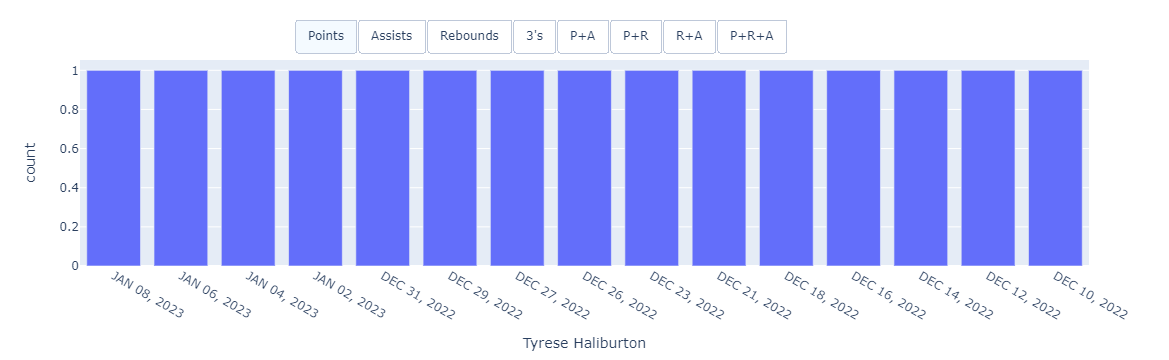

In [128]:
import plotly.express as px
data = play_no
fig = px.bar(data, x = "GAME_DATE", hover_name= "MATCHUP",
             hover_data=["GAME_DATE"])
fig.update_xaxes(
    dtick = "M1",
    tickformat = "%b\n%Y",
    title = inplayer,)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Points",
                        method="update",
                        args=[{"y": [data["PTS"], data["GAME_DATE"]]}]
                        
                       
                    ),
                    dict(
                        label="Assists",
                        method="update",
                        args=[{"y": [data["AST"], data["GAME_DATE"]]}],  
                        
                    ),
                    dict(
                        label = "Rebounds",
                        method = "update",
                        args=[{"y":[data["REB"], data["GAME_DATE"]]}],
                    
                        
                    ),
                    dict(
                        label = "3's",
                        method = "update",
                        args=[{"y":[data["FG3M"], data["GAME_DATE"]]}],
                    
                    ),
                    dict(
                        label = "P+A",
                        method = "update",
                        args=[{"y":[data["P+A"], data["GAME_DATE"]]}],
                        
                    ),
                    dict(
                        label = "P+R",
                        method = "update",
                        args=[{"y":[data["P+R"], data["GAME_DATE"]]}],
                
                    ),
                    dict(
                        label = "R+A",
                        method="update",
                        args=[{"y":[data["R+A"], data["GAME_DATE"]]}],
                    ),
                    dict(
                        label = "P+R+A",
                        method="update",
                        args=[{"y":[data["P+R+A"], data["GAME_DATE"]]}],
                        
                    ),
                    
                ]
            ),
        )
    ]
)
fig.show()

## Subplots

Now import the subplot modules from plotly and graph objects so all the visualisations can be seen at once and lines showing the median and mean can be added. Each statistic requires a new trace and location to be shown. the Mean and median lines must correspond with the location set for each trace. The median and mean were found in cells 12 and 13.

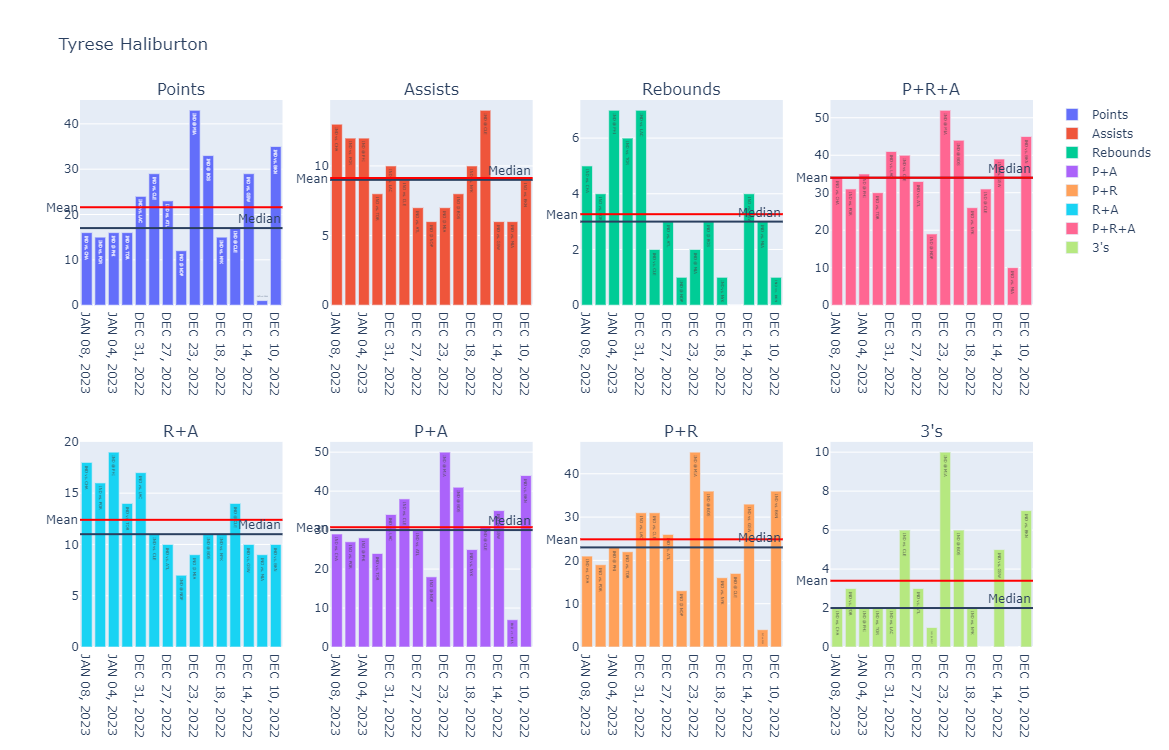

In [125]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=4,
    subplot_titles=("Points", "Assists", "Rebounds","P+R+A","R+A","P+A", "P+R", "3's"))

fig.add_trace(go.Bar(x = play_no['GAME_DATE'] ,y = play_no['PTS'], name="Points", text=play_no['MATCHUP']), row=1, col=1)
fig.add_hline(y=pl, row=1, col=1,annotation_text="Median")
fig.add_hline(y=plm,row=1,col=1,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x= play_no['GAME_DATE'], y=play_no['AST'],name="Assists", text= play_no['MATCHUP']), row=1, col=2)
fig.add_hline(y=al, row=1, col=2,annotation_text="Median")
fig.add_hline(y=alm,row=1,col=2,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['REB'],name="Rebounds", text = play_no['MATCHUP']), row=1, col=3)
fig.add_hline(y=rl, row=1, col=3,annotation_text="Median")
fig.add_hline(y=rlm,row=1,col=3,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['P+A'],name="P+A", text=play_no['MATCHUP']),  row=2, col=2)
fig.add_hline(y=pal, row=2, col=2,annotation_text="Median")
fig.add_hline(y=palm,row=2,col=2,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['P+R'],name="P+R", text=play_no['MATCHUP']), row=2,col=3)
fig.add_hline(y=prl, row=2, col=3,annotation_text="Median")
fig.add_hline(y=prlm,row=2,col=3,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['R+A'],name="R+A", text = play_no['MATCHUP']), row=2,col=1)
fig.add_hline(y=ral, row=2, col=1,annotation_text="Median")
fig.add_hline(y=ralm,row=2,col=1,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['P+R+A'],name="P+R+A", text=play_no['MATCHUP']), row=1, col=4)
fig.add_hline(y=pral, row=1, col=4,annotation_text="Median")
fig.add_hline(y=pralm,row=1,col=4,line_color='red',annotation_text="Mean",annotation_position="left")

fig.add_trace(go.Bar(x=play_no['GAME_DATE'], y=play_no['FG3M'], name="3's", text=play_no['MATCHUP']), row=2, col=4)
fig.add_hline(y=thr, row=2, col=4,annotation_text="Median")
fig.add_hline(y=thrm,row=2,col=4,line_color='red',annotation_text="Mean",annotation_position="left")
              
                   
fig.update_layout(height=750, width=1100,
                  title_text= inplayer)

fig.show()

## Season Data

It is possible to show a graph for all the data the player has accrued over a season which can be compared to the graphs above which could hold a much smaller or larger sample. This could help showif a player is in or out of form or the impact of team or style changes. The season can be changed as off the 4th line of the 3rd cell

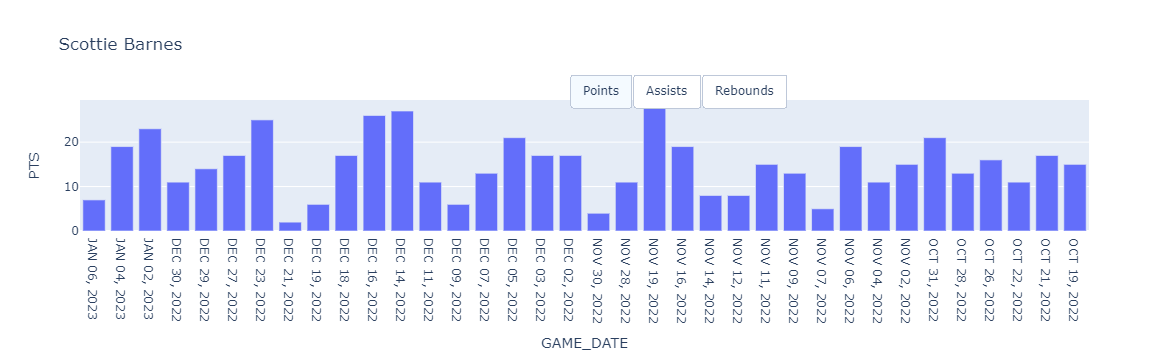

In [236]:
data = play
fig = px.bar(data, x = 'GAME_DATE', y = 'PTS',
            title = inplayer)

fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.7,
            y=1.2,
            showactive=True,
            buttons=list(
                [
                    dict(
                        label="Points",
                        method="update",
                        args=[{"y": [play["PTS"], play["GAME_DATE"]]}],
                    ),
                    dict(
                        label="Assists",
                        method="update",
                        args=[{"y": [play["AST"], play["GAME_DATE"]]}],   
                    ),
                    dict(
                        label = "Rebounds",
                        method = "update",
                        args=[{"y":[play["REB"], play["GAME_DATE"]]}],
                    ),    
                ]
            ),
        )
    ]
)